In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

Tín hiệu (y) là một mảng numpy có dạng: (84610,)
Tần số lấy mẫu (sr): 22050 Hz


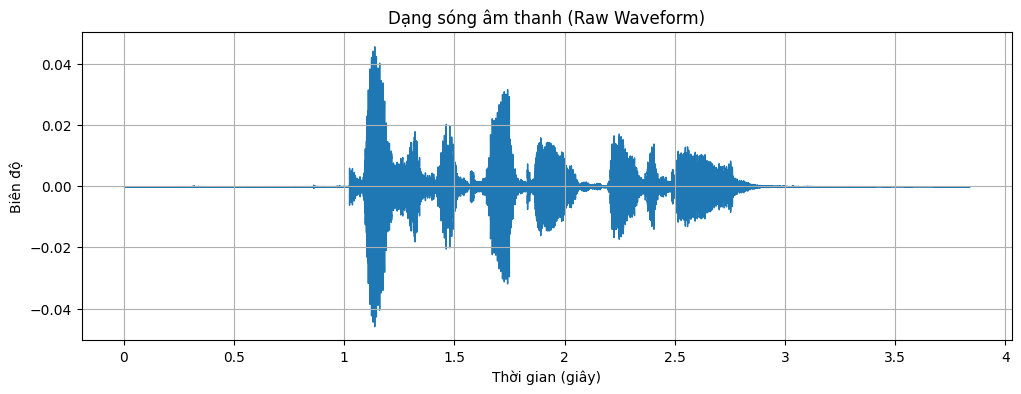

In [2]:
# 1. Chọn một file âm thanh mẫu
# (Hãy đảm bảo đường dẫn này đúng với cấu trúc thư mục của bạn)
file_path = "../data/raw/Actor_01/03-01-04-01-01-01-01.wav"

# 2. Tải file âm thanh bằng Librosa
# y = mảng numpy chứa tín hiệu (biên độ)
# sr = sample rate (tần số lấy mẫu), mặc định librosa sẽ đưa về 22050 Hz
y, sr = librosa.load(file_path)

print(f"Tín hiệu (y) là một mảng numpy có dạng: {y.shape}")
print(f"Tần số lấy mẫu (sr): {sr} Hz")

# 3. Trực quan hóa tín hiệu thô (Dạng sóng)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Dạng sóng âm thanh (Raw Waveform)')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Biên độ')
plt.grid(True)
plt.show()

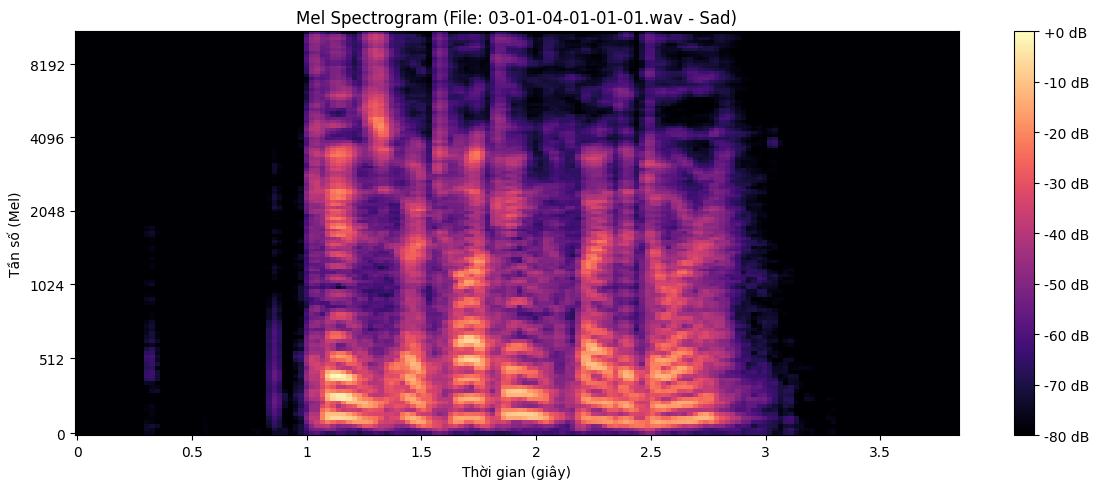

In [3]:
# 4. Tính toán Mel Spectrogram
# n_fft: Kích thước cửa sổ FFT (để thực hiện STFT)
# hop_length: Kích thước bước nhảy giữa các cửa sổ
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)

# 5. Chuyển đổi sang thang Decibel (dB)
# Chuyển từ biên độ (amplitude) sang thang log (dB) để dễ nhìn hơn
S_db = librosa.power_to_db(S, ref=np.max)

# 6. Trực quan hóa Mel Spectrogram
plt.figure(figsize=(12, 5))
# y_axis='mel', x_axis='time'
librosa.display.specshow(S_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')

plt.colorbar(format='%+2.0f dB')
plt.title(f'Mel Spectrogram (File: 03-01-04-01-01-01.wav - Sad)')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Tần số (Mel)')
plt.tight_layout()
plt.show()

Shape của MFCCs: (20, 166)


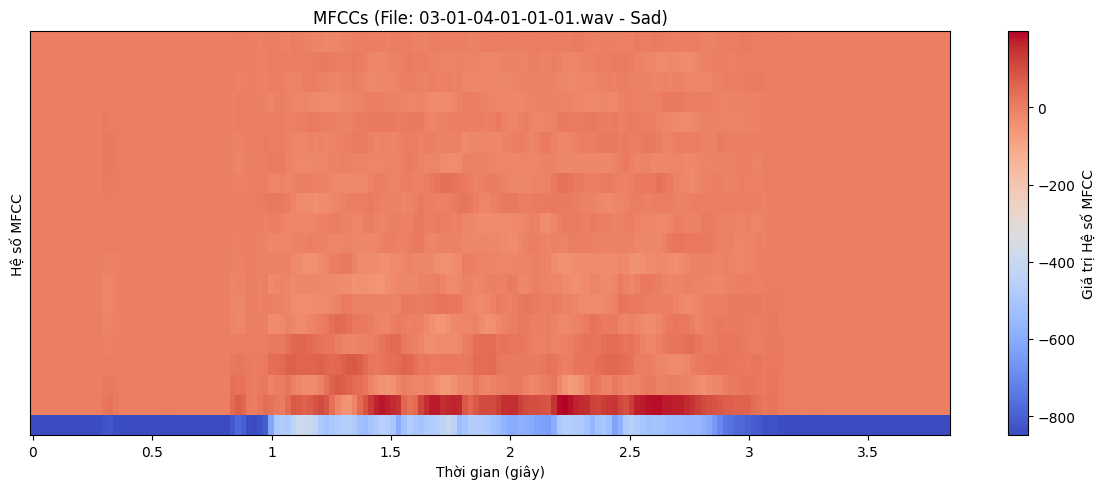

In [4]:
# 7. Tính toán MFCCs
# Chúng ta sẽ lấy 20 hệ số MFCC
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_fft=2048, hop_length=512, n_mfcc=20)

print(f"Shape của MFCCs: {mfccs.shape}")
# Kết quả sẽ là (20, N), nghĩa là 20 hệ số MFCC cho N khung thời gian (time frames)

# 8. Trực quan hóa MFCCs
plt.figure(figsize=(12, 5))
librosa.display.specshow(mfccs, sr=sr, hop_length=512, x_axis='time')

plt.colorbar(label='Giá trị Hệ số MFCC')
plt.title(f'MFCCs (File: 03-01-04-01-01-01.wav - Sad)')
plt.xlabel('Thời gian (giây)')
plt.ylabel('Hệ số MFCC')
plt.tight_layout()
plt.show()